In [77]:
import pandas as pd
import numpy as np
pd.set_option('display.max_column', None)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Data Exploration and Preprocessing

In [34]:
df_train = pd.read_csv('dataset/AMZN_train.csv')

In [35]:
df_train['target'] = (df_train['Close'] > df_train['Open']).shift(-1).fillna(0).astype(int)

In [36]:
df_train['target'].value_counts()

target
1    2392
0    2389
Name: count, dtype: int64

In [40]:
# EDA
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume,target
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03,4781.000000
mean,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06,0.500314
std,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06,0.500052
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05,0.000000
25%,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06,0.000000
50%,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06,1.000000
75%,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06,1.000000
max,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08,1.000000


In [41]:
df_train.groupby('target').describe()

Open                                                         \
         count        mean         std      min        25%        50%   
target                                                                  
0       2389.0  129.453403  147.705633  1.50000  34.630001  65.199997   
1       2392.0  125.788586  143.662449  1.40625  33.872500  60.195000   

                                  High                                    \
               75%         max   count        mean         std       min   
target                                                                     
0       189.500000  717.380005  2389.0  131.402870  149.207777  1.510417   
1       188.757496  705.789978  2392.0  127.559785  145.036025  1.447917   

                                                     Low              \
              25%    50%         75%         max   count        mean   
target                                                                 
0       35.040001  67.75  193.210007  722.450012  2389.0  127.537403   
1       34.509998  62.25  190.345001  719.000000  2392.0  123.860754   

                                                                          \
               std     min        25%        50%         75%         max   
target                                                                     
0       146.144454  1.3750  34.000000  63.375000  186.570007  711.510010   
1       141.941466  1.3125  33.339999  57.921875  185.404995  701.650024   

         Close                                                         \
         count        mean         std       min        25%       50%   
target                                                                  
0       2389.0  129.603692  147.835629  1.427083  34.630001  66.00000   
1       2392.0  125.723640  143.494554  1.395833  33.967500  59.65625   

                               Adj Close                                    \
               75%         max     count        mean         std       min   
target                                                                       
0       189.960007  717.929993    2389.0  129.603692  147.835629  1.427083   
1       188.037502  713.229980    2392.0  125.723640  143.494554  1.395833   

                                                     Volume                \
              25%       50%         75%         max   count          mean   
target                                                                      
0       34.630001  66.00000  189.960007  717.929993  2389.0  8.162766e+06   
1       33.967500  59.65625  188.037502  713.229980  2392.0  8.289025e+06   

                                                                              
                 std       min        25%        50%        75%          max  
target                                                                        
0       7.568127e+06  571200.0  4175000.0  6177900.0  9199200.0   81675600.0  
1       8.045769e+06  487200.0  4230325.0  6216700.0  9266150.0  104329200.0

In [42]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume,target
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0
...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0


Text(0, 0.5, 'Price')

<Figure size 1500x1000 with 0 Axes>

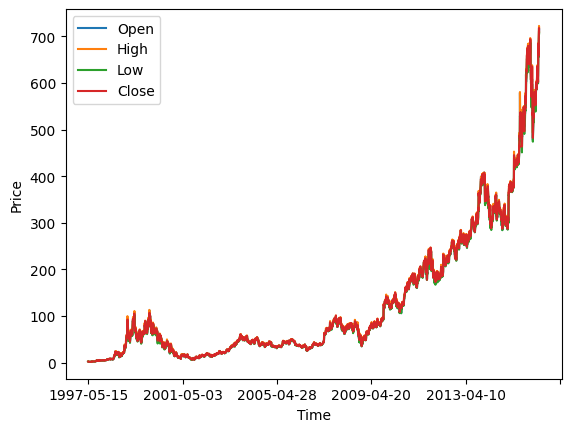

In [43]:
plt.figure(figsize=[15, 10])
# sns.lineplot(data=df_train, x='Date', y=['Open', 'High', 'Low', 'Close'])
df_train.plot(x='Date', y=['Open', 'High', 'Low', 'Close'])
plt.xlabel('Time')
plt.ylabel('Price')

In [44]:
# NULL HANDLING
df_train.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
target       0
dtype: int64

# Feature Engineering

Create Feature mainly in the following category:
1. Range variables - in the same data what is the price difference
2. Change variables - % changes in the same day and flag variables whether + or -
3. Lag - give context to model. what was the value few days back
4. moving averages, exponential moving average, momentum based variables
5. Temporal variables - Day of the week, month of year


In [46]:
df_train['Close_Open_diff'] = df_train['Close'] - df_train['Open']
df_train['High_Low_diff'] = df_train['High'] - df_train['Low']

In [47]:
df_train['Close_Open_diff_perc'] =(df_train['Close'] - df_train['Open'])/df_train['Open']
df_train['High_Low_diff_perc'] = (df_train['High'] - df_train['Low'])/df_train['Low']

In [48]:
df_train['Close_at_high'] = (df_train['Close'] == df_train['High']).astype(int)
df_train['Open_at_high'] = (df_train['Open'] == df_train['High']).astype(int)

df_train['Close_at_low'] = (df_train['Open'] == df_train['High']).astype(int)
df_train['Open_at_low'] = (df_train['Open'] == df_train['Low']).astype(int)

In [49]:
for shift in range(1, 4):
    for col in ['Open', 'Close', 'High', 'Low']:
        df_train[f'{col}_shift_{shift}'] = df_train[col].shift(shift)

In [ ]:
for col in ['Open', 'Close', 'High', 'Low']:
    df_train[f'{col}_mov_avg_window_3days'] = df_train[col].rolling(window=3, min_periods=1).mean()
    df_train[f'{col}_mov_avg_window_7days'] = df_train[col].rolling(window=7, min_periods=1).mean()
    df_train[f'{col}_mov_dev_window_3days'] = df_train[col].rolling(window=3, min_periods=1).std()
    df_train[f'{col}_mov_dev_window_7days'] = df_train[col].rolling(window=7, min_periods=1).std()

In [55]:
for col in ['Open', 'Close', 'High', 'Low']:
    df_train[f'{col}_exp_window_3days'] = df_train[col].ewm(span=3).mean()
    df_train[f'{col}_exp_window_7days'] = df_train[col].ewm(span=7).mean()

In [59]:
for col in ['Open', 'Close', 'High', 'Low']:
    df_train[f'Momentum_{col}_3days'] = df_train[col] - df_train[col].shift(3)

In [ ]:
df_train['Day'] = pd.to_datetime(df_train['Date']).dt.dayofweek
df_train['Month'] = pd.to_datetime(df_train['Date']).dt.strftime('%m')

In [68]:
numerical_columns = []
categorical_columns = []
for col in df_train.columns.tolist():
    try:
        df_train[col] = df_train[col].astype(float)
        if (df_train[col]%1==0).all():
            df_train[col] = df_train[col].astype(int)
        numerical_columns.append(col)

    except ValueError or TypeError:
        categorical_columns.append(col)
        pass

In [69]:
categorical_columns

['Date']

# Feature Selection

In [74]:
def iv_cal(df, target, col):
    lst = []

    for val in df[col].unique():
        bad = df.loc[(df[col]==val) & (df[target]==0)]['target'].count()
        good = df.loc[(df[col]==val) & (df[target]==1)]['target'].sum()
        lst.append([val, bad, good])

    iv_data = pd.DataFrame(lst, columns=['value', 'bad', 'good'])
    iv_data['dist_good'] = iv_data['good']/iv_data['good'].sum()
    iv_data['dist_bad'] = iv_data['bad']/iv_data['bad'].sum()
    iv_data['woe'] = np.log((iv_data['dist_good']+0.00001)/ (iv_data['dist_bad']+0.00001))
    iv_data['iv'] = (iv_data['dist_good'] - iv_data['dist_bad'])*iv_data['woe']
    return round(iv_data['iv'].sum(), 4)


In [80]:
iv_df = {}
target = 'target'
for col in tqdm(numerical_columns, desc='Processing', total=len(numerical_columns)):
    if col != target:
        iv_df[col] = iv_cal(df_train, target, col)

Processing: 100%|██████████| 57/57 [02:02<00:00,  2.15s/it]


In [81]:
iv_df = pd.DataFrame(list(iv_df.items()), columns=['Feature', 'IV'])

In [83]:
iv_df.sort_values(by = 'IV', ascending=False)

,Feature,IV
46,High_exp_window_3days,7.5146
49,Low_exp_window_7days,7.5146
42,Open_exp_window_3days,7.5146
43,Open_exp_window_7days,7.5146
48,Low_exp_window_3days,7.5146
47,High_exp_window_7days,7.5146
44,Close_exp_window_3days,7.5146
45,Close_exp_window_7days,7.5146
33,Close_mov_dev_window_7days,7.5073
29,Open_mov_dev_window_7days,7.5040


In [90]:
# RFE

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X_train = df_train[numerical_columns].copy()
X_train = X_train.drop(columns=['target'])
y_train = df_train['target']

model = RandomForestClassifier()
model.fit(X_train, y_train)

rfe = RFE(estimator=model, n_features_to_select = 25, verbose=1)
rfe.fit(X_train, y_train)

Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 fe

,estimator,RandomForestClassifier()
,n_features_to_select,25
,step,1
,verbose,1
,importance_getter,'auto'
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [95]:
columns_after_rfe = X_train.columns[rfe.support_].tolist()

In [96]:
categorical_columns

['Date']

# Model building

In [160]:
# selected_cols = categorical_columns + columns_after_rfe + ['target']
df_model =  df_train.copy()
df_model = df_model.dropna()

In [161]:
X_train = df_model.copy()
X_train.drop(columns=['target', 'Date'], inplace=True)

y_train = df_model['target']

In [162]:
# download test set and create all the variables
df_val = pd.read_csv('Dataset/AMZN_val.csv')

df_val['target'] = (df_val['Close'] > df_val['Open']).shift(-1).fillna(0).astype(int)

df_val['Close_Open_diff'] = df_val['Close'] - df_val['Open']
df_val['High_Low_diff'] = df_val['High'] - df_val['Low']

df_val['Close_Open_diff_perc'] =(df_val['Close'] - df_val['Open'])/df_val['Open']
df_val['High_Low_diff_perc'] = (df_val['High'] - df_val['Low'])/df_val['Low']

df_val['Close_at_high'] = (df_val['Close'] == df_val['High']).astype(int)
df_val['Open_at_high'] = (df_val['Open'] == df_val['High']).astype(int)

df_val['Close_at_low'] = (df_val['Open'] == df_val['High']).astype(int)
df_val['Open_at_low'] = (df_val['Open'] == df_val['Low']).astype(int)

for shift in range(1, 4):
    for col in ['Open', 'Close', 'High', 'Low']:
        df_val[f'{col}_shift_{shift}'] = df_val[col].shift(shift)

for col in ['Open', 'Close', 'High', 'Low']:
    df_val[f'{col}_mov_avg_window_3days'] = df_val[col].rolling(window=3, min_periods=1).mean()
    df_val[f'{col}_mov_avg_window_7days'] = df_val[col].rolling(window=7, min_periods=1).mean()
    df_val[f'{col}_mov_dev_window_3days'] = df_val[col].rolling(window=3, min_periods=1).std()
    df_val[f'{col}_mov_dev_window_7days'] = df_val[col].rolling(window=7, min_periods=1).std()

for col in ['Open', 'Close', 'High', 'Low']:
    df_val[f'{col}_exp_window_3days'] = df_val[col].ewm(span=3).mean()
    df_val[f'{col}_exp_window_7days'] = df_val[col].ewm(span=7).mean()

for col in ['Open', 'Close', 'High', 'Low']:
    df_val[f'Momentum_{col}_3days'] = df_val[col] - df_val[col].shift(3)

df_val['Day'] = pd.to_datetime(df_val['Date']).dt.dayofweek
df_val['Month'] = pd.to_datetime(df_val['Date']).dt.strftime('%m')


df_val = df_val[df_model.columns.tolist()]
df_val = df_val.dropna()

X_test = df_val.copy()
X_test.drop(columns=['target', 'Date'], inplace=True)
y_test = df_val['target']

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# linear regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_lr_pred_proba = model_lr.predict(X_test)
y_lr_pred = (y_lr_pred_proba>0.5).astype(int)

# random forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_rf_pred_proba = model_rf.predict(X_test)
y_rf_pred = (y_rf_pred_proba>0.5).astype(int)

# XGboost
model_xgb = GradientBoostingClassifier(learning_rate=0.005, random_state = 42)
model_xgb.fit(X_train, y_train)

y_xgb_pred_proba = model_xgb.predict(X_test)
y_xgb_pred = (y_xgb_pred_proba>0.5).astype(int)


# accuracy
acc_lr = accuracy_score(y_test, y_lr_pred)
acc_rf = accuracy_score(y_test, y_rf_pred)
acc_xgb = accuracy_score(y_test, y_xgb_pred)
print("Printing Accuracies of lr, rf, xgb : ", acc_lr, acc_rf, acc_xgb )

# AUC
auc_lr = roc_auc_score(y_test, y_lr_pred)
auc_rf = roc_auc_score(y_test, y_rf_pred)
auc_xgb = roc_auc_score(y_test, y_xgb_pred)
print("Printing AUC score of lr, rf, xgb : ", auc_lr, auc_rf, auc_xgb )

Printing Accuracies of lr, rf, xgb :  0.508 0.498 0.518
Printing AUC score of lr, rf, xgb :  0.5108827859932142 0.4902855130913514 0.5113789130017284


In [164]:
cr_lr = classification_report(y_test, y_lr_pred)
cr_rf = classification_report(y_test, y_rf_pred)
cr_xgb = classification_report(y_test, y_xgb_pred)

In [166]:
print(cr_xgb)

              precision    recall  f1-score   support

           0       0.51      0.93      0.66       254
           1       0.56      0.10      0.17       246

    accuracy                           0.52       500
   macro avg       0.54      0.51      0.41       500
weighted avg       0.54      0.52      0.42       500



In [171]:
# download OOT set and create all the variables
df_oot = pd.read_csv('Dataset/AMZN_test.csv')

df_oot['target'] = (df_oot['Close'] > df_oot['Open']).shift(-1).fillna(0).astype(int)

df_oot['Close_Open_diff'] = df_oot['Close'] - df_oot['Open']
df_oot['High_Low_diff'] = df_oot['High'] - df_oot['Low']

df_oot['Close_Open_diff_perc'] =(df_oot['Close'] - df_oot['Open'])/df_oot['Open']
df_oot['High_Low_diff_perc'] = (df_oot['High'] - df_oot['Low'])/df_oot['Low']

df_oot['Close_at_high'] = (df_oot['Close'] == df_oot['High']).astype(int)
df_oot['Open_at_high'] = (df_oot['Open'] == df_oot['High']).astype(int)

df_oot['Close_at_low'] = (df_oot['Open'] == df_oot['High']).astype(int)
df_oot['Open_at_low'] = (df_oot['Open'] == df_oot['Low']).astype(int)

for shift in range(1, 4):
    for col in ['Open', 'Close', 'High', 'Low']:
        df_oot[f'{col}_shift_{shift}'] = df_oot[col].shift(shift)

for col in ['Open', 'Close', 'High', 'Low']:
    df_oot[f'{col}_mov_avg_window_3days'] = df_oot[col].rolling(window=3, min_periods=1).mean()
    df_oot[f'{col}_mov_avg_window_7days'] = df_oot[col].rolling(window=7, min_periods=1).mean()
    df_oot[f'{col}_mov_dev_window_3days'] = df_oot[col].rolling(window=3, min_periods=1).std()
    df_oot[f'{col}_mov_dev_window_7days'] = df_oot[col].rolling(window=7, min_periods=1).std()

for col in ['Open', 'Close', 'High', 'Low']:
    df_oot[f'{col}_exp_window_3days'] = df_oot[col].ewm(span=3).mean()
    df_oot[f'{col}_exp_window_7days'] = df_oot[col].ewm(span=7).mean()

for col in ['Open', 'Close', 'High', 'Low']:
    df_oot[f'Momentum_{col}_3days'] = df_oot[col] - df_oot[col].shift(3)

df_oot['Day'] = pd.to_datetime(df_oot['Date']).dt.dayofweek
df_oot['Month'] = pd.to_datetime(df_oot['Date']).dt.strftime('%m')


df_oot = df_oot[df_model.columns.tolist()]
df_oot = df_oot.dropna()

X_oot = df_oot.copy()
X_oot.drop(columns=['target', 'Date'], inplace=True)
y_oot = df_oot['target']

In [173]:
y_xgb_pred_proba_oot = model_xgb.predict(X_oot)
y_xgb_pred_oot = (y_xgb_pred_proba_oot>0.5).astype(int)

y_lr_pred_proba_oot = model_lr.predict(X_oot)
y_lr_pred_oot = (y_lr_pred_proba_oot>0.5).astype(int)

auc_lr = roc_auc_score(y_oot, y_lr_pred_oot)
auc_xgb = roc_auc_score(y_oot, y_xgb_pred_oot)

print("Printing AUC of OOT for lr, gb : ", auc_lr, auc_xgb)

Printing AUC of OOT for lr, gb :  0.5067974627055973 0.4849706744868035
